In [1]:
install.packages('recommenderlab')
install.packages('ggplot2')
install.packages('data.table')
install.packages('reshape2')

Installing package into 'C:/Users/MANU/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'recommenderlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MANU\AppData\Local\Temp\RtmpiIEztX\downloaded_packages


Installing package into 'C:/Users/MANU/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MANU\AppData\Local\Temp\RtmpiIEztX\downloaded_packages


Installing package into 'C:/Users/MANU/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MANU\AppData\Local\Temp\RtmpiIEztX\downloaded_packages


Installing package into 'C:/Users/MANU/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MANU\AppData\Local\Temp\RtmpiIEztX\downloaded_packages


In [2]:
library('recommenderlab')
library('ggplot2')
library('data.table')
library('reshape2')

Warning message:
"package 'recommenderlab' was built under R version 3.6.3"Loading required package: Matrix
Loading required package: arules
Warning message:
"package 'arules' was built under R version 3.6.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: proxy
Warning message:
"package 'proxy' was built under R version 3.6.3"
Attaching package: 'proxy'

The following object is masked from 'package:Matrix':

    as.matrix

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix

Loading required package: registry
Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'reshape

In [3]:
movie_data <- read.csv("C:/Users/MANU/Desktop/College/Datasets/IMDB Movie dataset/movies.csv", stringsAsFactors = FALSE)
rating_data <- read.csv("C:/Users/MANU/Desktop/College/Datasets/IMDB Movie dataset/ratings.csv")
str(movie_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


In [4]:
summary(movie_data)

    movieId          title              genres         
 Min.   :     1   Length:10329       Length:10329      
 1st Qu.:  3240   Class :character   Class :character  
 Median :  7088   Mode  :character   Mode  :character  
 Mean   : 31924                                        
 3rd Qu.: 59900                                        
 Max.   :149532                                        

In [5]:
head(movie_data)

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller


In [6]:
summary(rating_data)

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  

In [7]:
head(rating_data)

userId,movieId,rating,timestamp
1,16,4.0,1217897793
1,24,1.5,1217895807
1,32,4.0,1217896246
1,47,4.0,1217896556
1,50,4.0,1217896523
1,110,4.0,1217896150


In [8]:
# PRE PROCESSING USING ONE HOT ENCODING

movie_genre <- as.data.frame(movie_data$genres,stringsAsFactors = FALSE)
library(data.table)
movie_genre2 <- as.data.frame(tstrsplit(movie_genre[,1],'[|]',type.convert = TRUE), stringsAsFactors = FALSE)
colnames(movie_genre2) <- c(1:10)

list_genre <- c("Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western")
genre_mat1 <- matrix(0,10330,18)
genre_mat1[1,] <- list_genre
colnames(genre_mat1) <- list_genre

for (index in 1:nrow(movie_genre2)) {
    for (col in 1:ncol(movie_genre2)) {
        gen_col = which(genre_mat1[1,] == movie_genre2[index,col])
        genre_mat1[index+1, gen_col] <- 1
    }
}
# Removing first row since it was the genre list
genre_mat2 <- as.data.frame(genre_mat1[-1,], stringsAsFactors = FALSE)
for (col in 1:ncol(genre_mat2)) {
    # Convert from char to int
    genre_mat2[,col] <- as.integer(genre_mat2[,col])
}
str(genre_mat2)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Film-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


In [9]:
SearchMatrix <- cbind(movie_data[,1:2], genre_mat2[])
head(SearchMatrix)

movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
ratingMatrix <- dcast(rating_data, userId~movieId, value.var = "rating", na.rm = FALSE)
# Remove userIds
ratingMatrix <- as.matrix(ratingMatrix[,-1])
# Convert rating matrix into a recommenderlab sparse matrix
ratingMatrix <- as(ratingMatrix, "realRatingMatrix")
ratingMatrix

668 x 10325 rating matrix of class 'realRatingMatrix' with 105339 ratings.

In [11]:
recommendation_model <- recommenderRegistry$get_entries(dataType = "realRatingMatrix")
names(recommendation_model)

[1] "HYBRID_realRatingMatrix"       "ALS_realRatingMatrix"         
 [3] "ALS_implicit_realRatingMatrix" "IBCF_realRatingMatrix"        
 [5] "LIBMF_realRatingMatrix"        "POPULAR_realRatingMatrix"     
 [7] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
 [9] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[11] "UBCF_realRatingMatrix"

In [12]:
lapply(recommendation_model,"[[", "description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

In [13]:
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

1,2,3,4
0.0000000,0.9760860,0.9641723,0.9914398
0.9760860,0.0000000,0.9925732,0.9374253
0.9641723,0.9925732,0.0000000,0.9888968
0.9914398,0.9374253,0.9888968,0.0000000


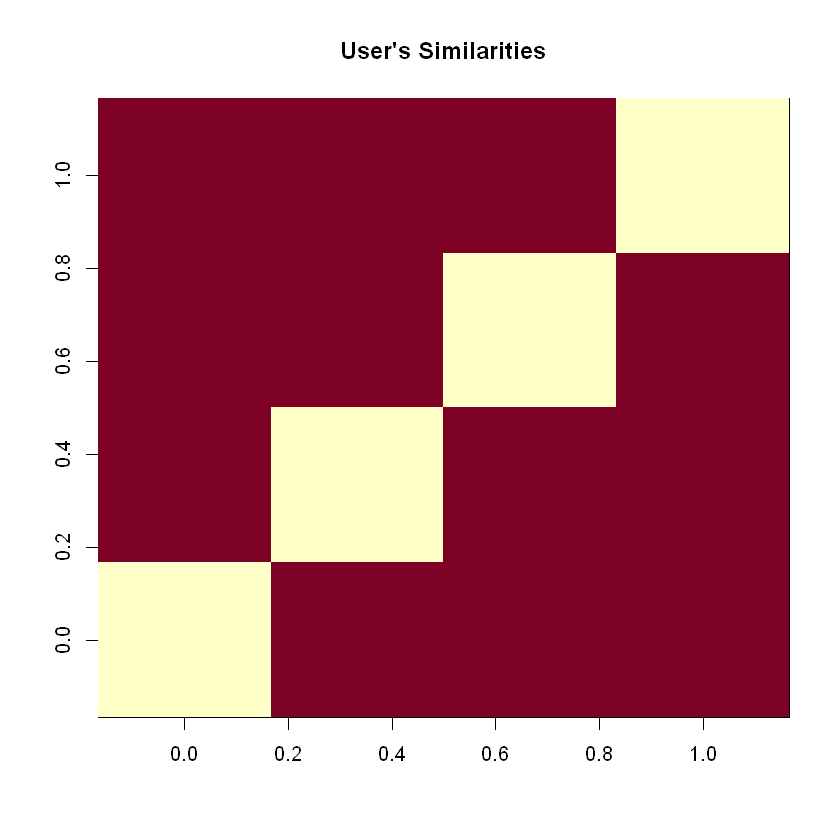

In [14]:
# Finding similar data
similarity_mat <- similarity(ratingMatrix[1:4, ], method = "cosine", which = "users")
as.matrix(similarity_mat)

image(as.matrix(similarity_mat), main = "User's Similarities")

1,2,3,4
0.0000000,0.9669732,0.9559341,0.9101276
0.9669732,0.0000000,0.9658757,0.9412416
0.9559341,0.9658757,0.0000000,0.9864877
0.9101276,0.9412416,0.9864877,0.0000000


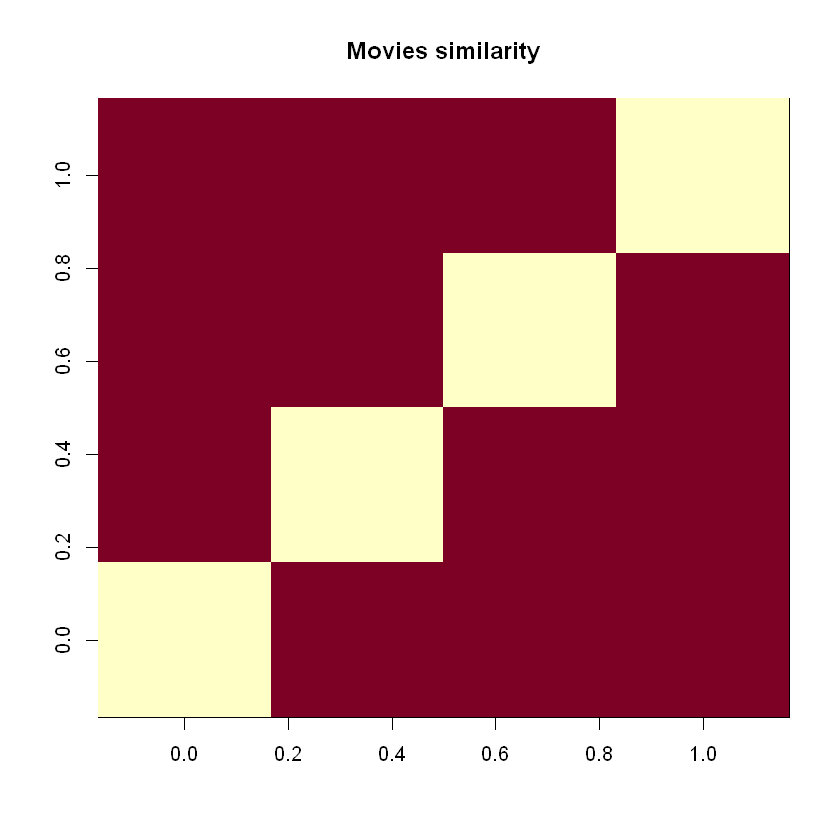

In [15]:
movie_similarity <- similarity(ratingMatrix[, 1:4], method = "cosine", which = "items")
as.matrix(movie_similarity)

image(as.matrix(movie_similarity), main = "Movies similarity")

In [16]:
rating_values <- as.vector(ratingMatrix@data)
# Extracting unique ratings
unique(rating_values)

[1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5

In [17]:
# Creating a count of movie ratings
Table_of_Ratings <- table(rating_values)
Table_of_Ratings

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 

In [18]:
# Most Viewed Movies Visualisation

library(ggplot2)
# Count views for each movie
movie_views <- colCounts(ratingMatrix)
# Create dataframe of views
table_views <- data.frame(movie = names(movie_views), views = movie_views)
# Sort by number of views
table_views <- table_views[order(table_views$views, decreasing = TRUE), ]
table_views$title <- NA
for (index in 1:10325) {
    table_views[index,3] <- as.character(subset(movie_data, movie_data$movieId == table_views[index,1])$title)
}
table_views[1:6,]

,movie,views,title
296,296,325,Pulp Fiction (1994)
356,356,311,Forrest Gump (1994)
318,318,308,"Shawshank Redemption, The (1994)"
480,480,294,Jurassic Park (1993)
593,593,290,"Silence of the Lambs, The (1991)"
260,260,273,Star Wars: Episode IV - A New Hope (1977)


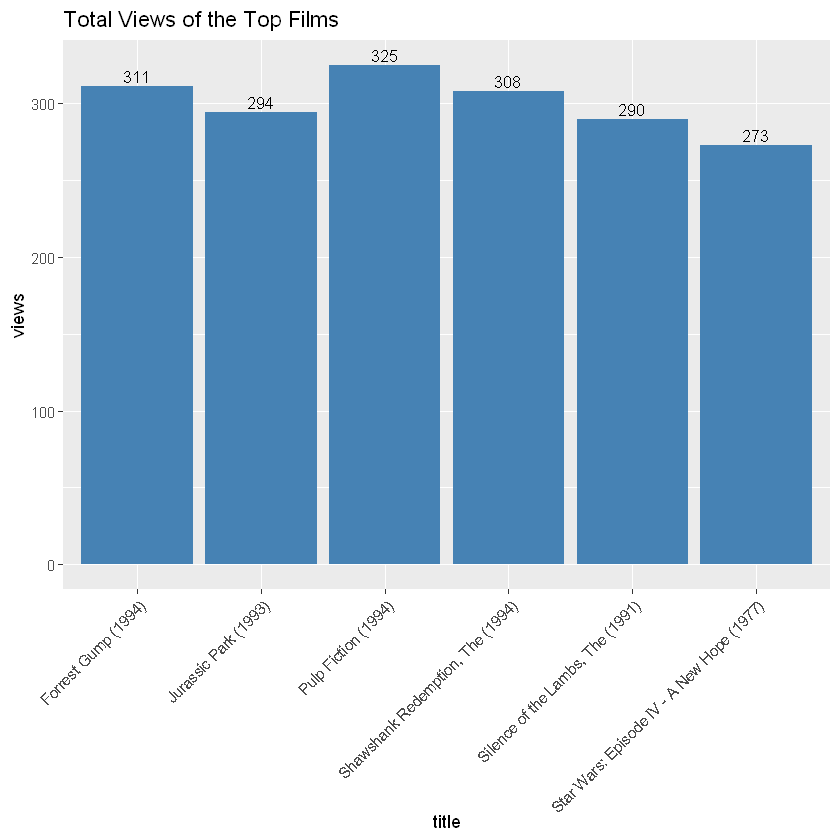

In [19]:
ggplot(table_views[1:6, ], aes(x = title, y= views)) + geom_bar(stat = "identity", fill = 'steelblue') + geom_text(aes(label = views), vjust = -0.3, size = 3.5) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + ggtitle("Total Views of the Top Films")

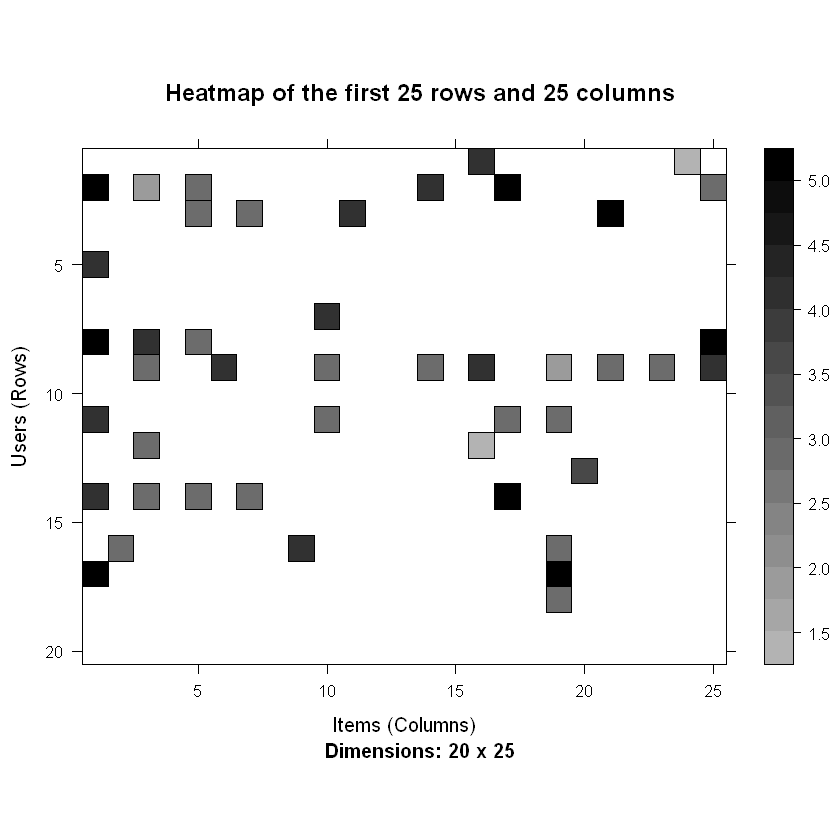

In [20]:
# Heatmap of movie ratings
image(ratingMatrix[1:20, 1:25], axes = FALSE, main = "Heatmap of the first 25 rows and 25 columns")

In [21]:
movie_ratings <- ratingMatrix[rowCounts(ratingMatrix) > 50, colCounts(ratingMatrix) > 50]
movie_ratings

420 x 447 rating matrix of class 'realRatingMatrix' with 38341 ratings.

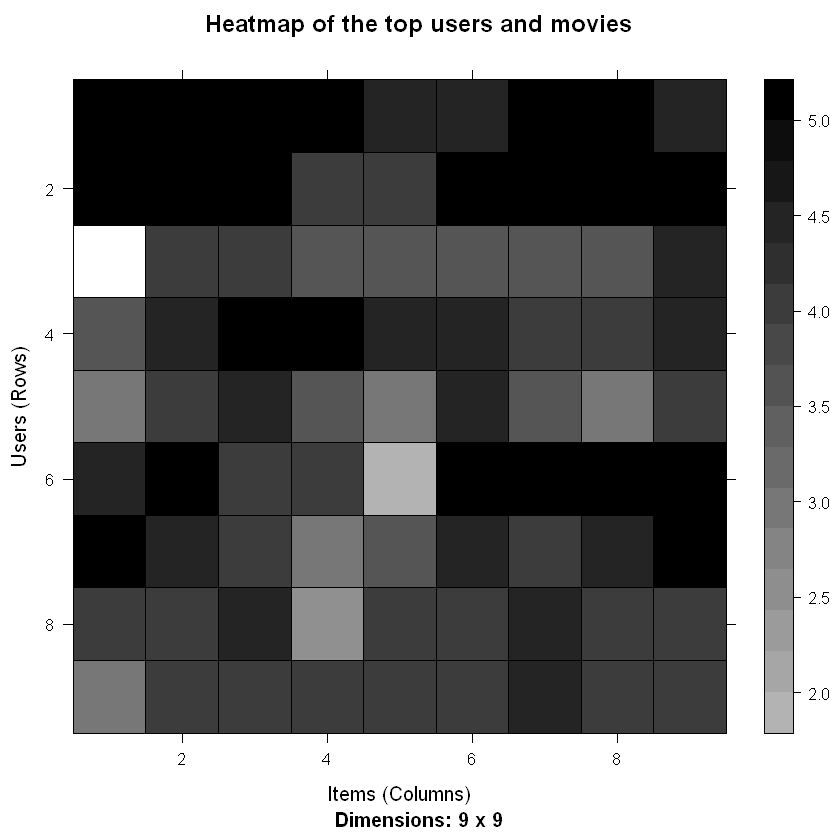

In [22]:
minimum_movies<- quantile(rowCounts(movie_ratings), 0.98)
minimum_users <- quantile(colCounts(movie_ratings), 0.98)
image(movie_ratings[rowCounts(movie_ratings) > minimum_movies, colCounts(movie_ratings) > minimum_users],
main = "Heatmap of the top users and movies")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


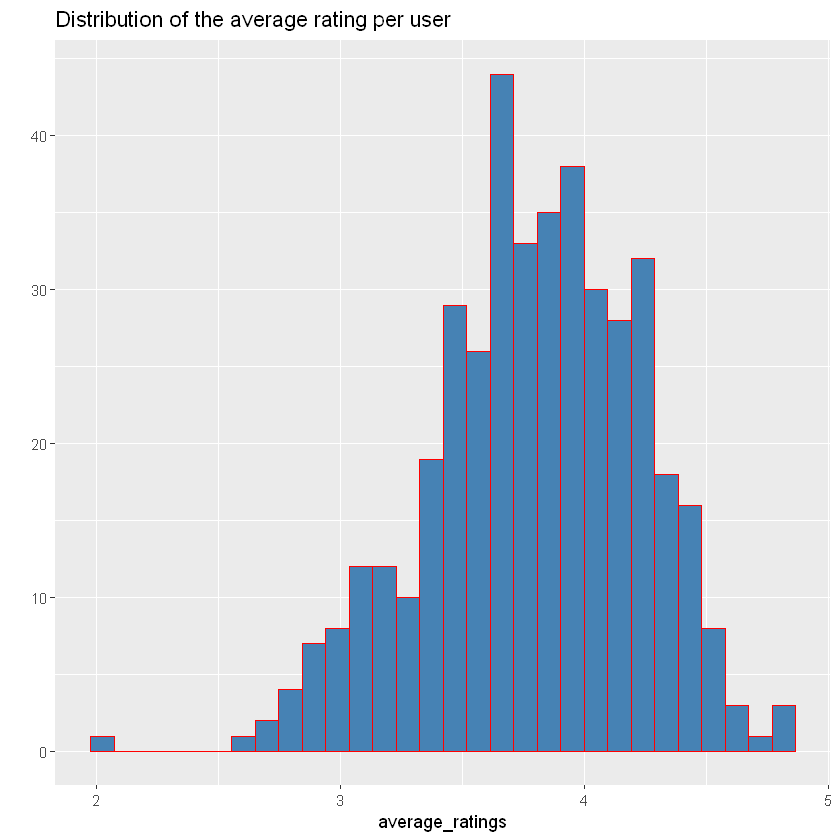

In [23]:
average_ratings <- rowMeans(movie_ratings)
qplot(average_ratings, fill=I("steelblue"), col=I("red")) + ggtitle("Distribution of the average rating per user")

[1] 0

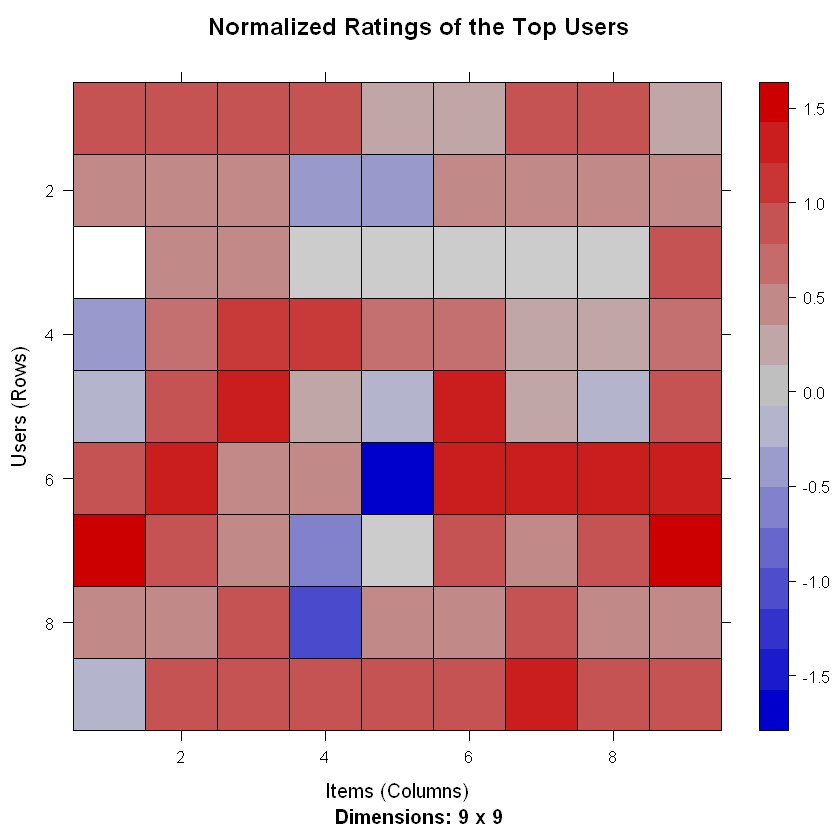

In [24]:
normalized_ratings <- normalize(movie_ratings)
sum(rowMeans(normalized_ratings) > 0.00001)

image(normalized_ratings[rowCounts(normalized_ratings) > minimum_movies, colCounts(normalized_ratings) > minimum_users],
main = "Normalized Ratings of the Top Users")

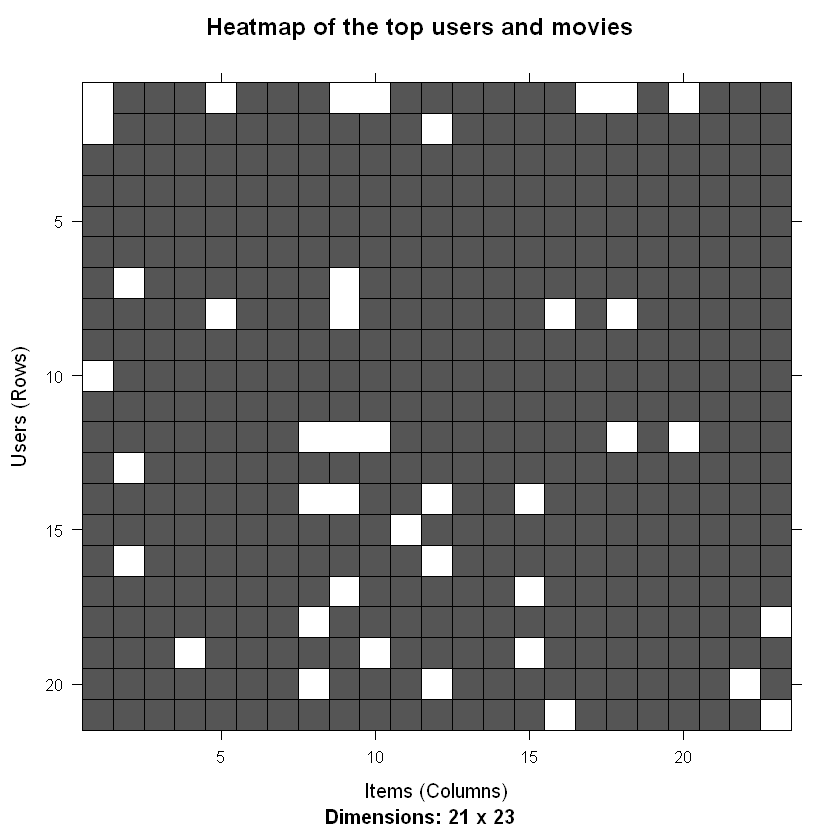

In [25]:
binary_minimum_movies <- quantile(rowCounts(movie_ratings), 0.95)
binary_minimum_users <- quantile(colCounts(movie_ratings), 0.95)
#movies_watched <- binarize(movie_ratings, minRating = 1)

good_rated_films <- binarize(movie_ratings, minRating = 3)
image(good_rated_films[rowCounts(movie_ratings) > binary_minimum_movies, colCounts(movie_ratings) > binary_minimum_users],
main = "Heatmap of the top users and movies")

In [26]:
sampled_data<- sample(x = c(TRUE, FALSE),
                      size = nrow(movie_ratings),
                      replace = TRUE,
                      prob = c(0.8, 0.2))
training_data <- movie_ratings[sampled_data, ]
testing_data <- movie_ratings[!sampled_data, ]

In [27]:
recommendation_system <- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [28]:
recommen_model <- Recommender(data = training_data,
                          method = "IBCF",
                          parameter = list(k = 30))
recommen_model
class(recommen_model)

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 329 users.

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

[1] 447 447

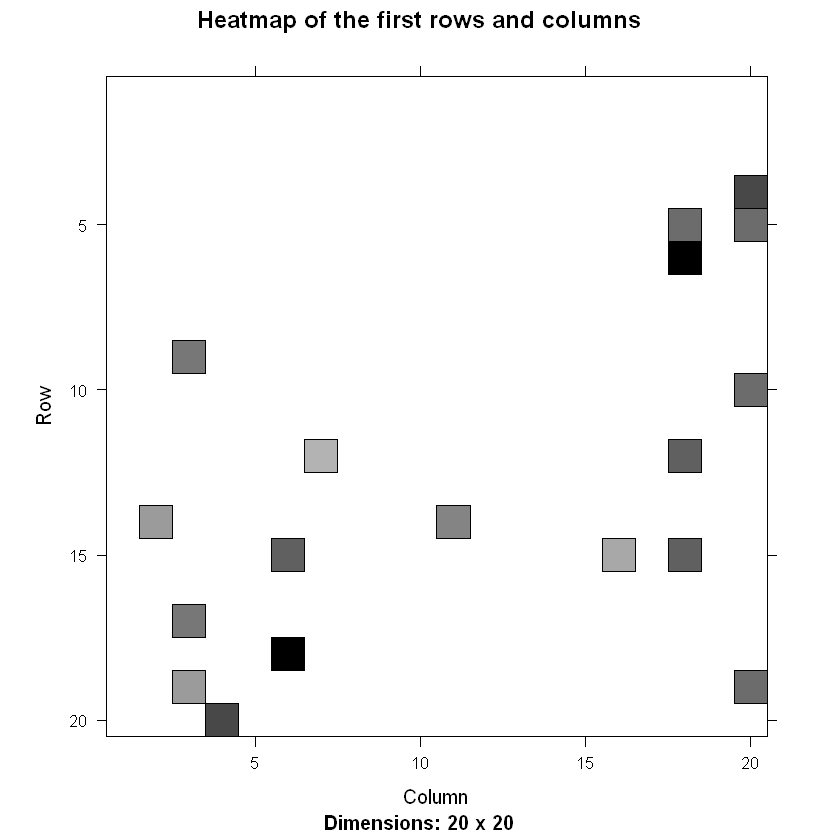

In [29]:
model_info <- getModel(recommen_model)
class(model_info$sim)
dim(model_info$sim)
top_items <- 20
image(model_info$sim[1:top_items, 1:top_items],
   main = "Heatmap of the first rows and columns")

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


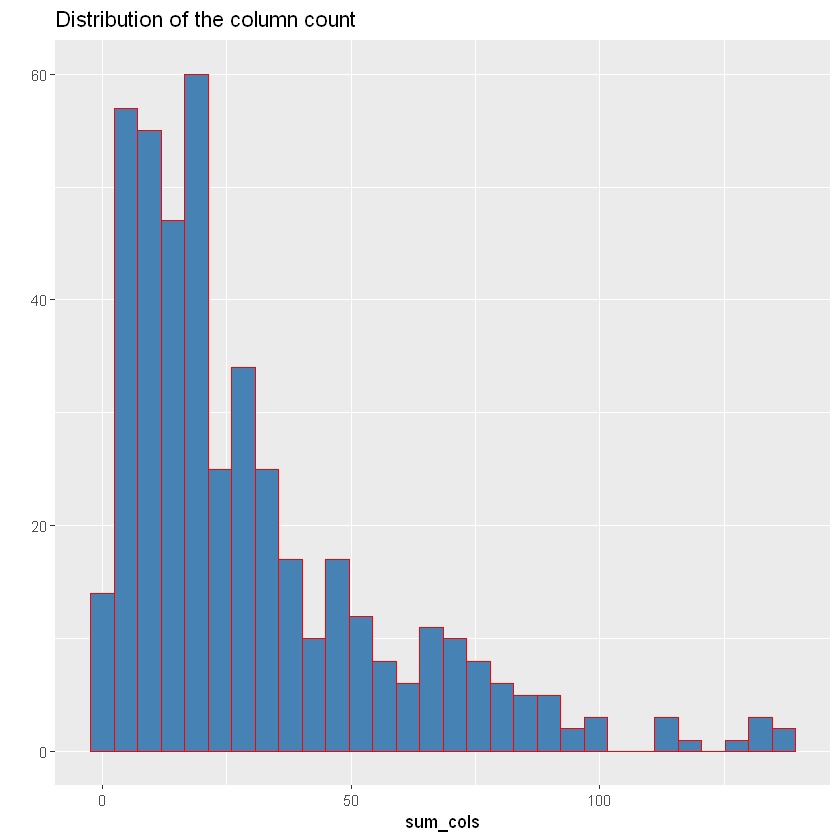

In [30]:
sum_rows <- rowSums(model_info$sim > 0)
table(sum_rows)

sum_cols <- colSums(model_info$sim > 0)
qplot(sum_cols, fill=I("steelblue"), col=I("red"))+ ggtitle("Distribution of the column count")

In [31]:
top_recommendations <- 10 # the number of items to recommend to each user
predicted_recommendations <- predict(object = recommen_model,
                          newdata = testing_data,
                          n = top_recommendations)
predicted_recommendations

Recommendations as 'topNList' with n = 10 for 91 users. 

In [32]:
user1 <- predicted_recommendations@items[[1]] # recommendation for the first user
movies_user1 <- predicted_recommendations@itemLabels[user1]
movies_user2 <- movies_user1
for (index in 1:10){
  movies_user2[index] <- as.character(subset(movie_data,
                                         movie_data$movieId == movies_user1[index])$title)
}
movies_user2

[1] "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)"
 [2] "Wallace & Gromit: The Wrong Trousers (1993)"                                
 [3] "Jumanji (1995)"                                                             
 [4] "City Slickers II: The Legend of Curly's Gold (1994)"                        
 [5] "Clueless (1995)"                                                            
 [6] "Species (1995)"                                                             
 [7] "Top Gun (1986)"                                                             
 [8] "Congo (1995)"                                                               
 [9] "Flintstones, The (1994)"                                                    
[10] "Green Mile, The (1999)"

In [33]:
recommendation_matrix <- sapply(predicted_recommendations@items,
                      function(x){ as.integer(colnames(movie_ratings)[x]) }) # matrix with the recommendations for each user
#dim(recc_matrix)
recommendation_matrix[,1:4]

750,2542,553,34
1148,3753,236,48
2,520,2321,70
432,49530,1304,110
39,1625,141,112
196,54286,2291,158
1101,2023,168,593
160,2078,953,1204
355,590,529,1275
3147,3703,485,1704
